## Step 01: Import Required Library 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Step 02: Import Dataset 

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
feature_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
feature_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target_data = pd.DataFrame(iris_data.target, columns = ['Target'])
target_data.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [6]:
data_set = pd.concat([feature_data, target_data], axis = 1)

In [7]:
data_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data visualization

Before going to modeling part, I want to visualize my data that will help me to understand my data better.

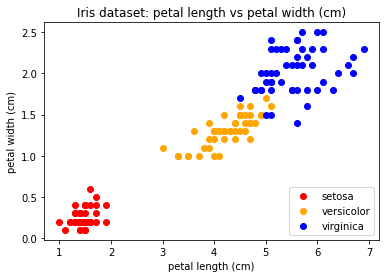

In [8]:
colours = ['red', 'orange', 'blue']
species = iris_data.target_names

for i in range(0, 3):    
    species_df = data_set[data_set['Target'] == i]    
    plt.scatter(        
        species_df['petal length (cm)'],        
        species_df['petal width (cm)'],
        color=colours[i],        
        alpha=1,        
        label=species[i]   
    )

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris dataset: petal length vs petal width (cm)')
plt.legend(loc='lower right')

plt.show()

## Split feature data and target data 

In [9]:
x_data = data_set.iloc[:, 0:4]
y_data = data_set.iloc[:,4]

## Train Test split 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, train_size = 0.8,  
                                                   random_state = 70311, shuffle = True, stratify = y_data)

## Model Selection - KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [13]:
pred = knn.predict(X_test)

In [14]:
pred_data = np.array([[7.5, 4, 5.5, 5.2]])

In [15]:
knn.predict(pred_data)

array([2])

## Accuracy of KNN model 

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, pred)

0.9333333333333333

## Model selection - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
predic_devision_tree = dtc.predict(X_test)

In [22]:
predic_devision_tree

array([1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 1, 0, 2, 0])

In [23]:
accuracy_score(y_test, predic_devision_tree)

0.9666666666666667

In [24]:
from sklearn.model_selection import cross_val_score

## Cross Validation 

In [25]:
scores_dt = cross_val_score(dtc, x_data, y_data, cv = 10)

In [26]:
scores_dt

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [27]:
np.mean(scores_dt)

0.9533333333333334